In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# load flights data from tsv
light = pd.read_csv('edited_data.txt', delimiter = '\t')
light.head()

,Day,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,9:25,10:12,11:19,12:40,13:53,14:48,14:56,14:14,13:03,11:47,10:30,9:34
1,2,9:26,10:14,11:21,12:42,13:55,14:49,14:55,14:12,13:01,11:44,10:28,9:33
2,3,9:27,10:16,11:24,12:45,13:58,14:50,14:55,14:10,12:58,11:41,10:25,9:32
3,4,9:28,10:18,11:26,12:47,14:00,14:51,14:54,14:08,12:56,11:39,10:23,9:31
4,5,9:29,10:20,11:29,12:50,14:02,14:52,14:53,14:06,12:53,11:36,10:21,9:30


In [10]:
# set the index to "Day"
light.set_index('Day', inplace=True)
light.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Day,,,,,,,,,,,,
1,9:25,10:12,11:19,12:40,13:53,14:48,14:56,14:14,13:03,11:47,10:30,9:34
2,9:26,10:14,11:21,12:42,13:55,14:49,14:55,14:12,13:01,11:44,10:28,9:33
3,9:27,10:16,11:24,12:45,13:58,14:50,14:55,14:10,12:58,11:41,10:25,9:32
4,9:28,10:18,11:26,12:47,14:00,14:51,14:54,14:08,12:56,11:39,10:23,9:31
5,9:29,10:20,11:29,12:50,14:02,14:52,14:53,14:06,12:53,11:36,10:21,9:30


In [12]:
# make sure columns are text so we can convert to float
light.dtypes

Jan    object
Feb    object
Mar    object
Apr    object
May    object
Jun    object
Jul    object
Aug    object
Sep    object
Oct    object
Nov    object
Dec    object
dtype: object

In [13]:
# create function to change time format into float
# split at the ":" then pull hours and mins (divide mins by 60 to get fraction of hour)
def decimal_time(t):
    try:
        t = t.split(':')
        hrs = float(t[0])
        mins = float(t[1]) / 60
        return str(round(hrs + mins, 3))
    except:
        return '0'
        

In [14]:
# test function just for fun
# will take string as argument
decimal_time('15:43')

'15.717'

In [16]:
# apply this function to all columns
for col in light.columns:
    light[col] = light[col].apply(decimal_time)


In [17]:
# test to see if it worked
light.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Day,,,,,,,,,,,,
1,9.417,10.2,11.317,12.667,13.883,14.8,14.933,14.233,13.05,11.783,10.5,9.567
2,9.433,10.233,11.35,12.7,13.917,14.817,14.917,14.2,13.017,11.733,10.467,9.55
3,9.45,10.267,11.4,12.75,13.967,14.833,14.917,14.167,12.967,11.683,10.417,9.533
4,9.467,10.3,11.433,12.783,14.0,14.85,14.9,14.133,12.933,11.65,10.383,9.517
5,9.483,10.333,11.483,12.833,14.033,14.867,14.883,14.1,12.883,11.6,10.35,9.5


In [21]:
# values are strings, convert to float to visualize
light = light.astype('float')
# check
light.dtypes

Jan    float64
Feb    float64
Mar    float64
Apr    float64
May    float64
Jun    float64
Jul    float64
Aug    float64
Sep    float64
Oct    float64
Nov    float64
Dec    float64
dtype: object

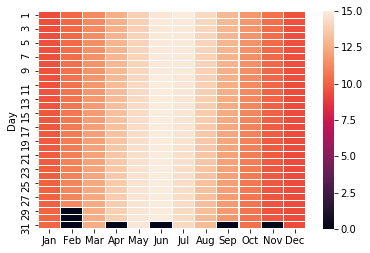

In [30]:
# create heatmap
sns.heatmap(light, linewidths=0.2, fmt=".0%")

In [32]:
# get max value of df for each column
# save it as a series then get max of monthly maximums
s = light.max(axis=1, skipna=True)
s.max()

14.983

In [38]:
light_p = light

In [39]:
for col in light_p.columns:
    light_p[col] = (light_p[col] / s.max()) * 100
    
light_p.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Day,,,,,,,,,,,,
1,186.860477,202.397458,224.561964,251.349863,275.478815,293.674743,296.313847,282.423825,258.949689,233.808750,208.350324,189.836910
2,187.177963,203.052273,225.216779,252.004678,276.153473,294.012072,295.996361,281.769010,258.294874,232.816605,207.695509,189.499581
3,187.515292,203.726931,226.208924,252.996822,277.145617,294.329558,295.996361,281.114195,257.302729,231.824461,206.703365,189.162252
4,187.852621,204.381747,226.863739,253.651638,277.800433,294.666887,295.659032,280.439537,256.628071,231.169646,206.028707,188.844765
5,188.170107,205.036562,227.855883,254.643782,278.455248,295.004216,295.321703,279.784721,255.635927,230.177501,205.373891,188.507436


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Day,,,,,,,,,,,,
1,186.860477,202.397458,224.561964,251.349863,275.478815,293.674743,296.313847,282.423825,258.949689,233.808750,208.350324,189.836910
2,187.177963,203.052273,225.216779,252.004678,276.153473,294.012072,295.996361,281.769010,258.294874,232.816605,207.695509,189.499581
3,187.515292,203.726931,226.208924,252.996822,277.145617,294.329558,295.996361,281.114195,257.302729,231.824461,206.703365,189.162252
4,187.852621,204.381747,226.863739,253.651638,277.800433,294.666887,295.659032,280.439537,256.628071,231.169646,206.028707,188.844765
5,188.170107,205.036562,227.855883,254.643782,278.455248,295.004216,295.321703,279.784721,255.635927,230.177501,205.373891,188.507436
